In [263]:
import pandas as pd
import numpy as np

## Energy data Analysis

In [264]:
energy_data = pd.read_csv("../data/daily_dataset/block_0.csv")
energy_data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [265]:
# Here target variable is energy sum 
# We are going to keep LCLid, day and energy_sum
energy_data = energy_data.drop(["energy_median","energy_mean", "energy_max", "energy_count", "energy_std", "energy_min"], axis=1)

In [266]:
energy_data.head()

,LCLid,day,energy_sum
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


In [267]:
energy_data["day"] = pd.to_datetime(energy_data["day"])

In [268]:
energy_data["day"] = energy_data["day"].dt.date # gets all the date
energy_data

,LCLid,day,energy_sum
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769
...,...,...,...
25569,MAC005492,2014-02-24,8.402
25570,MAC005492,2014-02-25,7.718
25571,MAC005492,2014-02-26,8.570
25572,MAC005492,2014-02-27,7.016


## Weather Data Analysis

In [269]:
weather = pd.read_csv("../data/weather_dataset/weather_daily_darksky.csv")
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [270]:
# Here we keep the temperatureMax, temperatureMin and the temperatureMaxTime
new_weather = weather[["temperatureMaxTime","temperatureMax","temperatureMin"]]

In [271]:
new_weather.head()

,temperatureMaxTime,temperatureMax,temperatureMin
0,2011-11-11 23:00:00,11.96,8.85
1,2011-12-11 14:00:00,8.59,2.48
2,2011-12-27 02:00:00,10.33,8.03
3,2011-12-02 23:00:00,8.07,2.56
4,2011-12-24 23:00:00,8.22,3.17


In [272]:
new_weather["temperatureMaxTime"] = pd.to_datetime(new_weather["temperatureMaxTime"])

C:\Users\sarve\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [273]:
new_weather["day"] = new_weather["temperatureMaxTime"].dt.date

In [274]:
new_weather # This is the final weather dataset

,temperatureMaxTime,temperatureMax,temperatureMin,day
0,2011-11-11 23:00:00,11.96,8.85,2011-11-11
1,2011-12-11 14:00:00,8.59,2.48,2011-12-11
2,2011-12-27 02:00:00,10.33,8.03,2011-12-27
3,2011-12-02 23:00:00,8.07,2.56,2011-12-02
4,2011-12-24 23:00:00,8.22,3.17,2011-12-24
...,...,...,...,...
877,2014-01-26 16:00:00,9.03,3.26,2014-01-26
878,2014-02-27 14:00:00,10.31,3.93,2014-02-27
879,2014-03-09 14:00:00,18.97,7.65,2014-03-09
880,2014-02-12 16:00:00,8.83,3.03,2014-02-12


In [275]:
new_weather["day"] = new_weather["day"].sort_values()

C:\Users\sarve\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


## Merging the energy and weather dataset based on the date

In [276]:
final_df = energy_data.merge(right=new_weather, how="inner")
final_df = final_df.drop(["temperatureMaxTime"], axis=1)
final_df["LCLid"].nunique()
final_df

,LCLid,day,energy_sum,temperatureMax,temperatureMin
0,MAC000002,2012-10-13,11.087000,11.53,6.41
1,MAC000246,2012-10-13,19.283000,11.53,6.41
2,MAC000450,2012-10-13,89.343999,11.53,6.41
3,MAC001074,2012-10-13,22.727000,11.53,6.41
4,MAC003223,2012-10-13,19.271000,11.53,6.41
...,...,...,...,...,...
25565,MAC004387,2012-10-11,4.758000,14.88,9.15
25566,MAC004431,2012-10-11,24.459000,14.72,8.51
25567,MAC004431,2012-10-11,24.459000,14.88,9.15
25568,MAC005492,2012-10-11,8.771000,14.72,8.51


## PreProcessing and Implementation of Random Forest

In [277]:
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [278]:
def preprocessing_pipeline(data: pd.DataFrame, isInference:bool = False) -> pd.DataFrame:

    numerical_data = get_numerical_values(data) 

    categorical_data = get_categorical_columns(data)

    encoded_categorical_data = get_encoded_data(categorical_data, isInference)

    encoded_categorical_data_df = convert_to_dataframe(encoded_categorical_data)

    processed_df = concat_dataframes_on_index(numerical_data, encoded_categorical_data_df)

    return processed_df

In [279]:
# Gets numerical columns from the dataset
def get_numerical_values(data: pd.DataFrame) -> pd.DataFrame:
    numerical_data = data.select_dtypes(include=[np.number])
    return numerical_data


# Gets categorical columns from the dataset
def get_categorical_columns(data: pd.DataFrame) -> pd.DataFrame:
    categorical_data = data.select_dtypes(exclude=[np.number])
    return categorical_data

# Performing normalization of numerical data
# def min_max_normalization(numerical_data: pd.DataFrame) -> MinMaxScaler:
#     scaler = MinMaxScaler()
#     scaled_data = MinMaxScaler(numerical_data)
#     # display(scaled_data)
#     return scaled_data

# Performing encoding -> Feature engineering
def get_encoded_data(categorical_data: pd.DataFrame, isInference = False) -> np.ndarray:
    if not isInference:
        global cat_data_list
        cat_df = categorical_data
        cat_df = cat_df.dropna(axis=0)
        display(cat_df)
        
        ohe = OneHotEncoder(handle_unknown = 'ignore')
        encoded_categorical_fit = ohe.fit(cat_df)
        encoded_categorical_data = encoded_categorical_fit.transform(cat_df)
        store_model(encoded_categorical_fit,"../models/", isEncoder=True)
        encoded_categorical_data = encoded_categorical_data.toarray()
    else:
        cat_df = categorical_data
        display(cat_df)
        cat_df = cat_df.dropna(axis=0)
        path = "../models/encoder/encoder_1.joblib"
        encoded_model = load_model(path)
        encoded_categorical_data = encoded_model.transform(cat_df)
        encoded_categorical_data = encoded_categorical_data.toarray()
    return encoded_categorical_data

# Convertion to dataFrame
def convert_to_dataframe(data_np: np.ndarray) -> pd.DataFrame:
    return pd.DataFrame(data_np)

# Saves the model
def store_model(model, model_path: str, isEncoder: bool = False) -> str:
    from joblib import dump, load
    if not isEncoder:
        model_path = model_path + "model_1.joblib"
        dump(model, model_path)
    else:
        model_encoder_path = "../models/encoder/encoder_1.joblib"
        dump(model, model_encoder_path)
        return model_encoder_path
    return model_path

def concat_dataframes_on_index(numerical_data: pd.DataFrame, encoded_categorical_data: pd.DataFrame) -> pd.DataFrame:
    global num_data_list
    num_df = numerical_data
    final_df = pd.concat([num_df, encoded_categorical_data], axis=1, join="inner")
    return final_df

def load_model(path: str):
    from joblib import dump, load
    loaded_model = load(path)
    return loaded_model


In [280]:
# processed_df = preprocessing_pipeline(final_df)

In [281]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression

## Creating Training pipeline

In [282]:
def training(X_train: pd.DataFrame, y_train: pd.Series):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
#     regr = AdaBoostRegressor()
    model_r = regr.fit(X_train, y_train)
    model_score = regr.score(X_train,y_train)
    return model_r

def model_evaluation(model, y_pred: np.ndarray, y_test: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

def perform_data_splitting(X: pd.DataFrame, y: pd.Series):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)  
    return X_train, X_test, y_train, y_test

In [283]:
def train(path: str , model_path: str) -> dict:
    
    data_master = final_df
    data = data_master.copy()

    y = data["energy_sum"]

    processed_df = preprocessing_pipeline(final_df)
    processed_df = processed_df.drop(labels=["energy_sum"], axis=1)
    
    X_train, X_test, y_train, y_test = perform_data_splitting(processed_df,y)

    model = training(X_train, y_train)

    y_predicted = model.predict(X_test)

    model_score = model_evaluation(model,y_predicted, y_test)
    
    model_path = store_model(model,model_path) # Saves the model

    return {"model_performance": model_score, "model_path": model_path}


In [284]:
train("/","../models/")

,LCLid,day
0,MAC000002,2012-10-13
1,MAC000246,2012-10-13
2,MAC000450,2012-10-13
3,MAC001074,2012-10-13
4,MAC003223,2012-10-13
...,...,...
25565,MAC004387,2012-10-11
25566,MAC004431,2012-10-11
25567,MAC004431,2012-10-11
25568,MAC005492,2012-10-11


C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


{'model_performance': 0.69, 'model_path': '../models/model_1.joblib'}

In [285]:
final_df

,LCLid,day,energy_sum,temperatureMax,temperatureMin
0,MAC000002,2012-10-13,11.087000,11.53,6.41
1,MAC000246,2012-10-13,19.283000,11.53,6.41
2,MAC000450,2012-10-13,89.343999,11.53,6.41
3,MAC001074,2012-10-13,22.727000,11.53,6.41
4,MAC003223,2012-10-13,19.271000,11.53,6.41
...,...,...,...,...,...
25565,MAC004387,2012-10-11,4.758000,14.88,9.15
25566,MAC004431,2012-10-11,24.459000,14.72,8.51
25567,MAC004431,2012-10-11,24.459000,14.88,9.15
25568,MAC005492,2012-10-11,8.771000,14.72,8.51


In [286]:
from joblib import load
model_1 = load("../models/model_1.joblib")
user_data = {"LCLid": "MAC000258", "day": "2020-02-01","temperatureMax": [11.53], "temperatureMin": [10.50]}
user_df = pd.DataFrame(data=user_data)

processed_df_1 = preprocessing_pipeline(user_df, isInference=True)
# processed_df_1 = processed_df_1.drop(labels=["energy_sum"], axis=1)

predicted_price = model_1.predict(processed_df_1)
predicted_price
# processed_df_1 = processed_df_1.reindex(labels=processed_df.columns,axis=1)
# processed_df

,LCLid,day
0,MAC000258,2020-02-01


C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([18.53987497])

In [228]:
def inference(test_path: str, model_path: str) -> np.ndarray:
    data_master = prepare_data(test_path)
    data = data_master.copy()
#     data = data.drop(labels=["day"], axis=1) # dropping the day column.

    processed_df = preprocessing_pipeline(data, isInference=True)
    processed_df = processed_df.drop(labels=["energy_sum"], axis=1)

    model = load_model(model_path)

    predicted_price = model.predict(processed_df)

    return predicted_price

def prepare_data(filepath):
    energy_data = pd.read_csv(filepath)
    weather = pd.read_csv("../data/weather_dataset/weather_daily_darksky.csv")

    energy_data = energy_data.drop(["energy_median","energy_mean", "energy_max", "energy_count", "energy_std", "energy_min"], axis=1)
    new_weather = weather[["temperatureMaxTime","temperatureMax","temperatureMin"]]

    energy_data["day"] = pd.to_datetime(energy_data["day"])
    energy_data["day"] = energy_data["day"].dt.date # gets all the date


    new_weather["temperatureMaxTime"] = pd.to_datetime(new_weather["temperatureMaxTime"])
    new_weather["day"] = new_weather["temperatureMaxTime"].dt.date
    new_weather["day"] = new_weather["day"].sort_values()

    final_df = energy_data.merge(right=new_weather, how="inner")
    final_df = final_df.drop(["temperatureMaxTime"], axis=1)
    return final_df

In [229]:
production_values = inference("../data/daily_dataset/block_0.csv", "../models/model_1.joblib")
print(production_values)

C:\Users\sarve\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,LCLid,day
0,MAC000002,2012-10-13
1,MAC000246,2012-10-13
2,MAC000450,2012-10-13
3,MAC001074,2012-10-13
4,MAC003223,2012-10-13
...,...,...
25565,MAC004387,2012-10-11
25566,MAC004431,2012-10-11
25567,MAC004431,2012-10-11
25568,MAC005492,2012-10-11


[18.53987497 18.53987497 72.27449164 ... 18.53987497 18.53987497
 18.53987497]


C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [232]:
len(set(production_values))

50

In [69]:
testdata = final_df.drop(labels="energy_sum", axis=1)
print(type(testdata))
transformed_data = encoder_model.transform(testdata)
transformed_arr = transformed_data.toarray()
# processed_df = preprocessing_pipeline(tra)
print(type(testdata.iloc[0]))

<class 'pandas.core.frame.DataFrame'>


C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- temperatureMax
- temperatureMin
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but OneHotEncoder is expecting 2 features as input.

In [51]:
model.predict(processed_df)

C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([18.53987497, 18.53987497, 72.27449164, ..., 18.53987497,
       18.53987497, 18.53987497])

## Testing ARIMA Models

In [192]:
pos_X = final_df[final_df["LCLid"]=="MAC000002"]["energy_sum"]

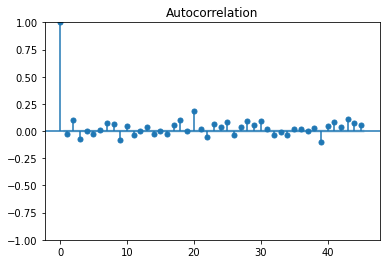

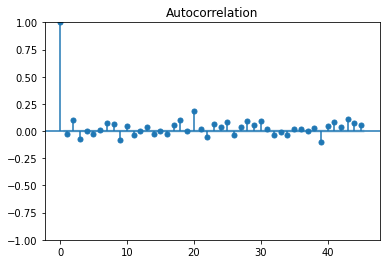

In [193]:
# We have to convert the series into stationary otherwise we cannot perform timeseries analysis
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(final_df["energy_sum"])

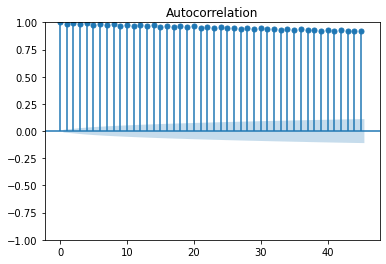

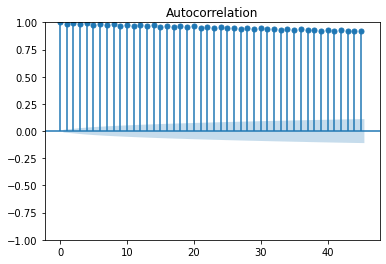

In [194]:
plot_acf(final_df["temperatureMax"]) # This is not stationary

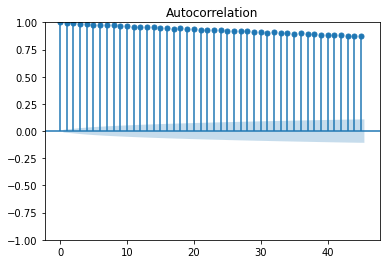

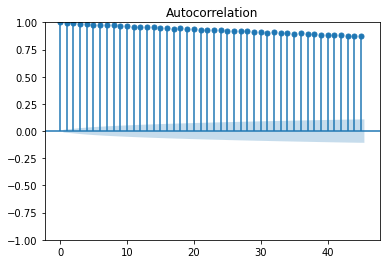

In [195]:
plot_acf(final_df["temperatureMin"]) # this is not stationary

In [196]:
X = pos_X
train_data = pos_X[:450]
test = pos_X[450:]

In [197]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

model_ar = AutoReg(train_data, lags=2)
model_ar_fit = model_ar.fit()

C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [198]:
predictions = model_ar_fit.predict(start=450, end=504)

C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


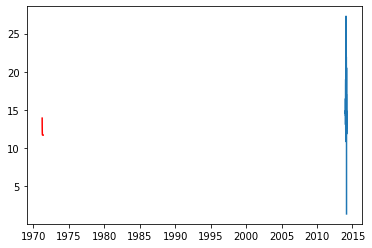

In [199]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(predictions, color="red")

In [200]:
from statsmodels.tsa.arima.model import ARIMA

In [201]:
# p,d,q p=periods taken for Ar model.
# d is the order of integration order.
# q periods on the moving average
model_arima = ARIMA(train_data, order=(1,1,1))
model_arima_fit = model_arima.fit()

C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [202]:
predictions = model_arima_fit.forecast(steps=5000)

C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [203]:
predictions

450     13.516038
451     13.083691
452     12.876450
453     12.777110
454     12.729493
          ...    
5445    12.685654
5446    12.685654
5447    12.685654
5448    12.685654
5449    12.685654
Name: predicted_mean, Length: 5000, dtype: float64

KeyError: 'energy_sum'

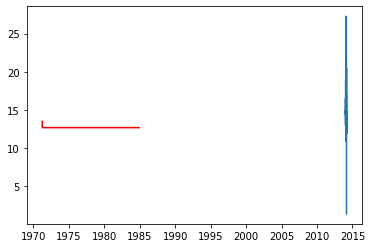

In [204]:
plt.plot(test)
plt.plot(predictions, color="red")
test["energy_sum"].min()

In [4]:
import os, sys


notebook_path = os.getcwd()
path_to_package_test = notebook_path[:-10]
path_to_app_test = path_to_package_test + "\\pipelines"
sys.path.extend([path_to_package_test, path_to_app_test])
sys.path

['C:\\Users\\sarve\\Documents\\DS-Production\\Energy_production\\notebooks',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\python39.zip',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\DLLs',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\lib',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv',
 '',
 'C:\\Users\\sarve\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\lib\\site-packages',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\lib\\site-packages\\win32',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\sarve\\miniconda3\\envs\\dataProdEnv\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\sarve\\.ipython',
 'C:\\Users\\sarve\\Documents\\DS-Production\\Energy_production',
 'C:\\Users\\sarve\\Documents\\DS-Production\\Energy_production\\app',
 'C:\\Users\\sarve\\Documents\\DS-

In [5]:
from pipelines.train import train

C:\Users\sarve\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\util

{'model_performance': 0.69, 'model_path': '../models/model_1.joblib'}


C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sarve\miniconda3\envs\dataProdEnv\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


{'model_performance': 0.69, 'model_path': '../models/model_1.joblib'}
